In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import yfinance as yf
import datetime
import pytz

# Function to fetch stock price using yfinance
def get_stock_price(ticker):
    stock = yf.Ticker(ticker)
    try:
        stock_info = stock.info
        price = stock_info.get('currentPrice')
        return price
    except ValueError as e:
        print(f"Error retrieving info for {ticker}: {e}")
        return None

# Get the current day of the week (Monday is 0, Sunday is 6)
# Time zone for Central Time (CT)
central_tz = pytz.timezone('America/Chicago')

# Get the current time in Central Time Zone
current_time_central = datetime.datetime.now(central_tz)

# Print the current time in Central Time to verify
print("Current time in Central Time Zone:", current_time_central)

# Get the day of the week (Monday is 0, Sunday is 6)
current_day = current_time_central.weekday()

# Adjust the threshold based on the current day
threshold = max(0, current_day - 1)

# Scrape data from MarketWatch
headers = {
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:87.0) Gecko/20100101 Firefox/87.0',
}
url = 'https://www.marketwatch.com/tools/earningscalendar'
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.content, 'html.parser')

tables = soup.find_all('table')

# List to hold DataFrame objects for each ticker symbol
ticker_data_list = []

for i, table in enumerate(tables):
    if not table.find('tbody').find_all('tr'):
        continue

    earning_date = f'Earnings_{i+1}'
    df = pd.read_html(str(table))[0]

    # Determine the release status based on the earnings number
    release_status = 'Yes' if i < threshold else 'No'

    # Add 'Released' column with the determined status
    df['Released'] = release_status

    # Extract and print ticker symbols if the column exists
    if 'Symbol' in df.columns:
        ticker_symbols = df['Symbol'].dropna().unique()

        # Fetch stock prices and append to the list of DataFrame objects
        for ticker in ticker_symbols:
            price = get_stock_price(ticker)
            ticker_data_list.append(pd.DataFrame(
                {'Symbol': [ticker], 'Stock Price': [price], 'Released': [release_status]}))

# Concatenate all DataFrame objects into a single DataFrame
ticker_data = pd.concat(ticker_data_list, ignore_index=True)

# Filter out rows where 'Stock Price' is None or NaN
ticker_data = ticker_data.dropna(subset=['Stock Price'])

# Sort the DataFrame by stock price in descending order
ticker_data_sorted = ticker_data.sort_values(by='Stock Price', ascending=False)


Current time in Central Time Zone: 2023-12-14 00:21:12.703568-06:00


Options data for CASY:
Market Sentiment for CASY is leaning Bullish.
Average Implied Volatility for Calls: 0.09615949974522835
Average Implied Volatility for Puts: 0.5177676467060437
Total Call Volume: 1107.0
Total Call open interest: 36
Total Put Volume: 751.0
Total Put open interest: 159
Number of ITM Call Options: 24
Number of ITM Put Options: 17


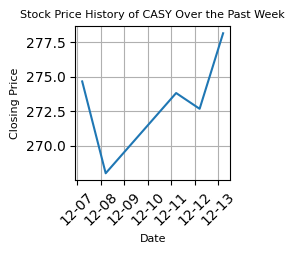

Options data for ORCL:
Market Sentiment for ORCL is leaning Bullish.
Average Implied Volatility for Calls: 0.16610917128579863
Average Implied Volatility for Puts: 0.07621979395303154
Total Call Volume: 201539.0
Total Call open interest: 1508
Total Put Volume: 155608.0
Total Put open interest: 19469.0
Number of ITM Call Options: 175
Number of ITM Put Options: 225


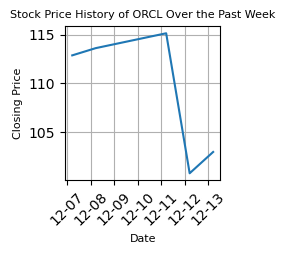

Options data for CZMWY:
Market Sentiment for CZMWY is leaning Bearish.
Average Implied Volatility for Calls: 0
Average Implied Volatility for Puts: 0
Total Call Volume: 0
Total Call open interest: 0
Total Put Volume: 0
Total Put open interest: 0
Number of ITM Call Options: 0
Number of ITM Put Options: 0


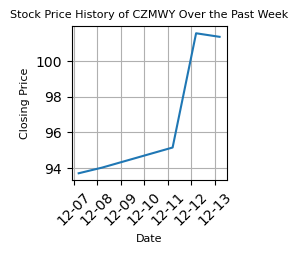

Options data for JCI:
Market Sentiment for JCI is leaning Bullish.
Average Implied Volatility for Calls: 0.1914542620017955
Average Implied Volatility for Puts: 0.1603668338861507
Total Call Volume: 4631.0
Total Call open interest: 2015
Total Put Volume: 3423.0
Total Put open interest: 543
Number of ITM Call Options: 54
Number of ITM Put Options: 53


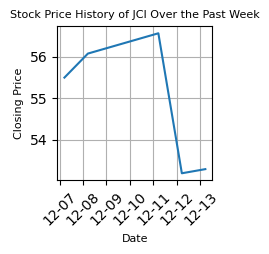

Options data for BLBD:
Market Sentiment for BLBD is leaning Bullish.
Average Implied Volatility for Calls: 0.006259937500000001
Average Implied Volatility for Puts: 0.21016414843749998
Total Call Volume: 570.0
Total Call open interest: 0
Total Put Volume: 235
Total Put open interest: 0
Number of ITM Call Options: 15
Number of ITM Put Options: 1


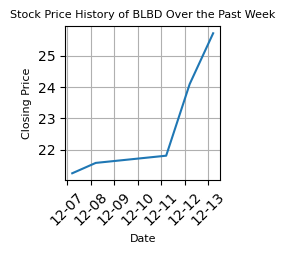

Options data for LXEO:
Market Sentiment for LXEO is leaning Bearish.
Average Implied Volatility for Calls: 0
Average Implied Volatility for Puts: 0
Total Call Volume: 0
Total Call open interest: 0
Total Put Volume: 0
Total Put open interest: 0
Number of ITM Call Options: 0
Number of ITM Put Options: 0


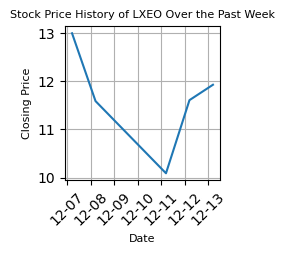

Options data for OCCI:
Market Sentiment for OCCI is leaning Bearish.
Average Implied Volatility for Calls: 0
Average Implied Volatility for Puts: 0
Total Call Volume: 0
Total Call open interest: 0
Total Put Volume: 0
Total Put open interest: 0
Number of ITM Call Options: 0
Number of ITM Put Options: 0


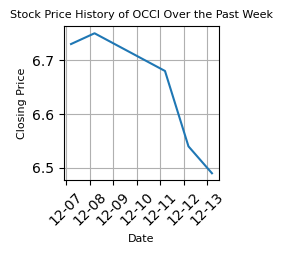

Options data for UEC:
Market Sentiment for UEC is leaning Bearish.
Average Implied Volatility for Calls: 0.10575064463517155
Average Implied Volatility for Puts: 0.38478352180626274
Total Call Volume: 29621.0
Total Call open interest: 19
Total Put Volume: 33290.0
Total Put open interest: 675
Number of ITM Call Options: 67
Number of ITM Put Options: 29


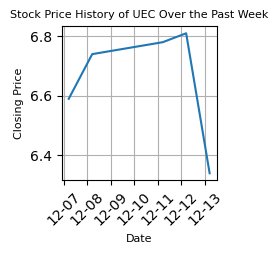

Options data for EPIX:
Market Sentiment for EPIX is leaning Bullish.
Average Implied Volatility for Calls: 0.177091875
Average Implied Volatility for Puts: 0.3772855615234375
Total Call Volume: 283
Total Call open interest: 0
Total Put Volume: 53.0
Total Put open interest: 7
Number of ITM Call Options: 6
Number of ITM Put Options: 2


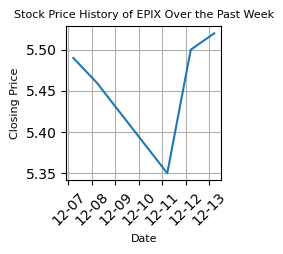

Options data for MAMA:
Market Sentiment for MAMA is leaning Bullish.
Average Implied Volatility for Calls: 0.18002122070312498
Average Implied Volatility for Puts: 0.176766044921875
Total Call Volume: 369
Total Call open interest: 3
Total Put Volume: 107
Total Put open interest: 22
Number of ITM Call Options: 4
Number of ITM Put Options: 5


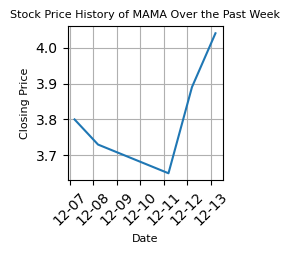

Options data for NOTV:
Market Sentiment for NOTV is leaning Bullish.
Average Implied Volatility for Calls: 2.893341966708097
Average Implied Volatility for Puts: 0.036467968749999996
Total Call Volume: 487.0
Total Call open interest: 2848
Total Put Volume: 128.0
Total Put open interest: 21
Number of ITM Call Options: 4
Number of ITM Put Options: 10


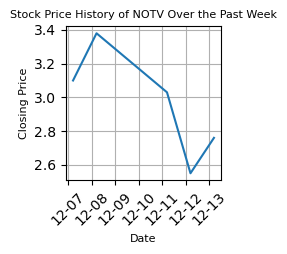

Options data for SST:
Market Sentiment for SST is leaning Bullish.
Average Implied Volatility for Calls: 1.0615322549479167
Average Implied Volatility for Puts: nan
Total Call Volume: 549.0
Total Call open interest: 17019
Total Put Volume: 72.0
Total Put open interest: 3356.0
Number of ITM Call Options: 0
Number of ITM Put Options: 21


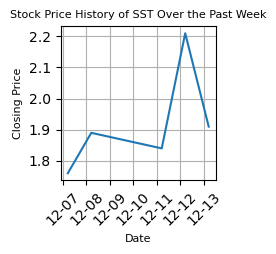

Options data for AGFY:
Market Sentiment for AGFY is leaning Bearish.
Average Implied Volatility for Calls: 0
Average Implied Volatility for Puts: 0
Total Call Volume: 0
Total Call open interest: 0
Total Put Volume: 0
Total Put open interest: 0
Number of ITM Call Options: 0
Number of ITM Put Options: 0


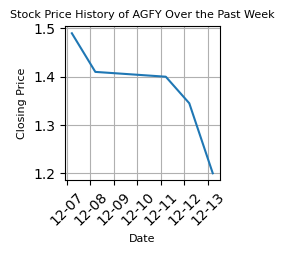

Options data for LPTV:
Market Sentiment for LPTV is leaning Bearish.
Average Implied Volatility for Calls: 0
Average Implied Volatility for Puts: 0
Total Call Volume: 0
Total Call open interest: 0
Total Put Volume: 0
Total Put open interest: 0
Number of ITM Call Options: 0
Number of ITM Put Options: 0


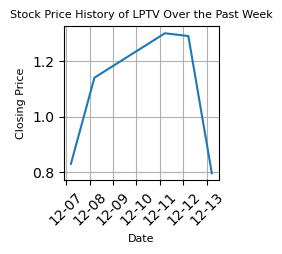

Options data for EMKR:
Market Sentiment for EMKR is leaning Bullish.
Average Implied Volatility for Calls: 3.583338177083334
Average Implied Volatility for Puts: 1.0000000000000003e-05
Total Call Volume: 73.0
Total Call open interest: 22
Total Put Volume: 2.0
Total Put open interest: 0.0
Number of ITM Call Options: 0
Number of ITM Put Options: 4


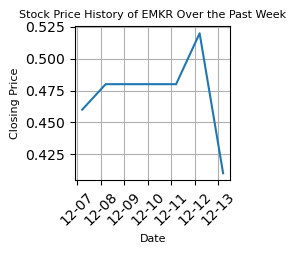

Options data for AKUMQ:
Market Sentiment for AKUMQ is leaning Bearish.
Average Implied Volatility for Calls: 0
Average Implied Volatility for Puts: 0
Total Call Volume: 0
Total Call open interest: 0
Total Put Volume: 0
Total Put open interest: 0
Number of ITM Call Options: 0
Number of ITM Put Options: 0


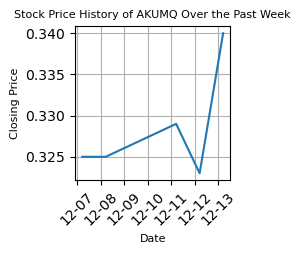

In [2]:
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime, timedelta
import matplotlib.dates as mdates

# Set the time frame for the past week
end_date = datetime.now()
start_date = end_date - timedelta(days=7)

# Iterate through the sorted list of tickers
for index, row in ticker_data_sorted.iterrows():
    ticker = row['Symbol']
    released = row['Released']

    stock = yf.Ticker(ticker)

    # Initialize variables for options data
    total_call_volume, total_call_open_interest, total_call_implied_volatility = 0, 0, 0
    total_put_volume, total_put_open_interest, total_put_implied_volatility = 0, 0, 0
    total_itm_calls, total_itm_puts = 0, 0
    exp_dates_count = 0

    # Get options expiration dates
    exp_dates = stock.options

    # Retrieve and analyze options data for each expiration date
    for date in exp_dates:
        options_data = stock.option_chain(date)
        call_options, put_options = options_data.calls, options_data.puts

        # Aggregate call and put metrics
        total_call_volume += call_options['volume'].sum()
        total_call_open_interest += call_options['openInterest'].sum()
        total_call_implied_volatility += call_options['impliedVolatility'].mean()

        total_put_volume += put_options['volume'].sum()
        total_put_open_interest += put_options['openInterest'].sum()
        total_put_implied_volatility += put_options['impliedVolatility'].mean()

        # Count ITM options
        total_itm_calls += call_options[call_options['inTheMoney']].shape[0]
        total_itm_puts += put_options[put_options['inTheMoney']].shape[0]

        exp_dates_count += 1

    # Averaging implied volatility over all expiration dates
    if exp_dates_count > 0:
        avg_call_implied_volatility = total_call_implied_volatility / exp_dates_count
        avg_put_implied_volatility = total_put_implied_volatility / exp_dates_count
    else:
        avg_call_implied_volatility = avg_put_implied_volatility = 0

    # Market Sentiment
    if released == 'Yes':
        
        sentiment = "Bullish" if total_call_volume + total_call_open_interest > total_put_volume + total_put_open_interest else "Bearish"
        print(f"===========================================")
        print(f"Options data for {ticker}:")
        print(f"Market Sentiment for {ticker} is leaning {sentiment}.")

        # Implied Volatility and ITM Options
        print(f"Average Implied Volatility for Calls: {avg_call_implied_volatility}")
        print(f"Average Implied Volatility for Puts: {avg_put_implied_volatility}")

        print(f"Total Call Volume: {total_call_volume}")
        print(f"Total Call open interest: {total_call_open_interest}")

        print(f"Total Put Volume: {total_put_volume}")
        print(f"Total Put open interest: {total_put_open_interest}")

        print(f"Number of ITM Call Options: {total_itm_calls}")
        print(f"Number of ITM Put Options: {total_itm_puts}")

    # Plot only if earnings have been released
    if released == 'Yes':

        # Fetching and plotting stock price history
        hist = stock.history(start=start_date, end=end_date)

        # Plotting the closing prices
        plt.figure(figsize=(3, 3))
        plt.plot(hist.index, hist['Close'])
        plt.title(f"Stock Price History of {ticker} Over the Past Week", fontsize=8)

        # Formatting the x-axis to show the date without the year
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))  # Format as 'Month-Day'
        plt.gca().xaxis.set_major_locator(mdates.DayLocator())  # Set major ticks to days
        plt.xticks(rotation=45)  # Rotate for better readability

        plt.xlabel('Date', fontsize=8)
        plt.ylabel('Closing Price', fontsize=8)
        plt.grid(True)
        plt.show()


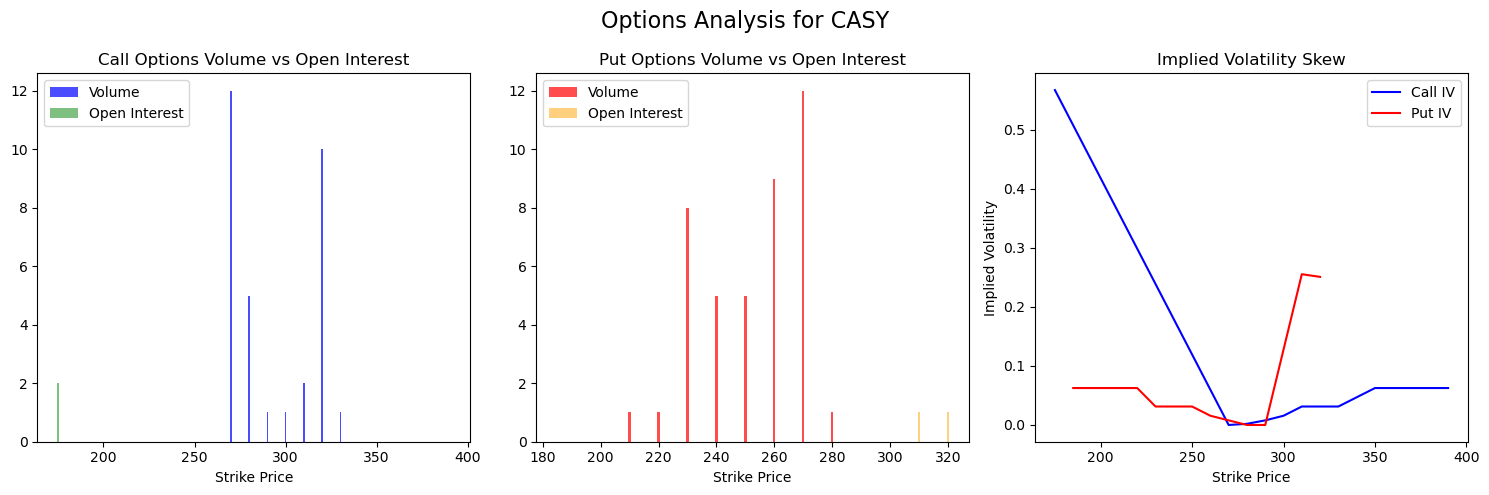

ITM Calls: 2, OTM Calls: 9
ITM Puts: 4, OTM Puts: 8


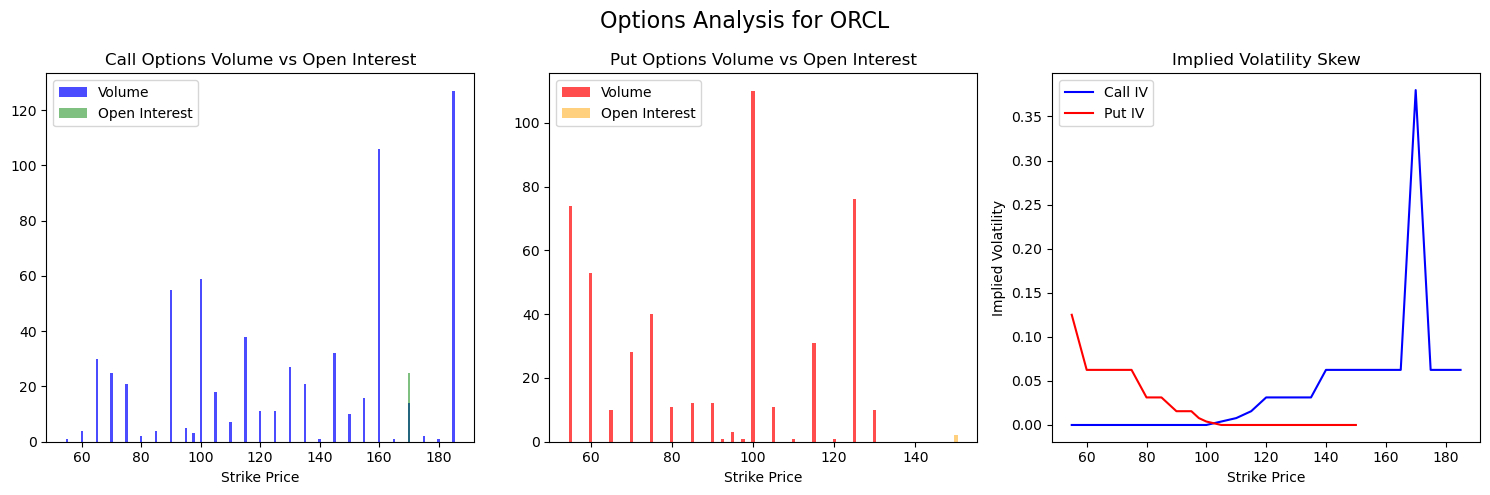

ITM Calls: 11, OTM Calls: 17
ITM Puts: 7, OTM Puts: 12


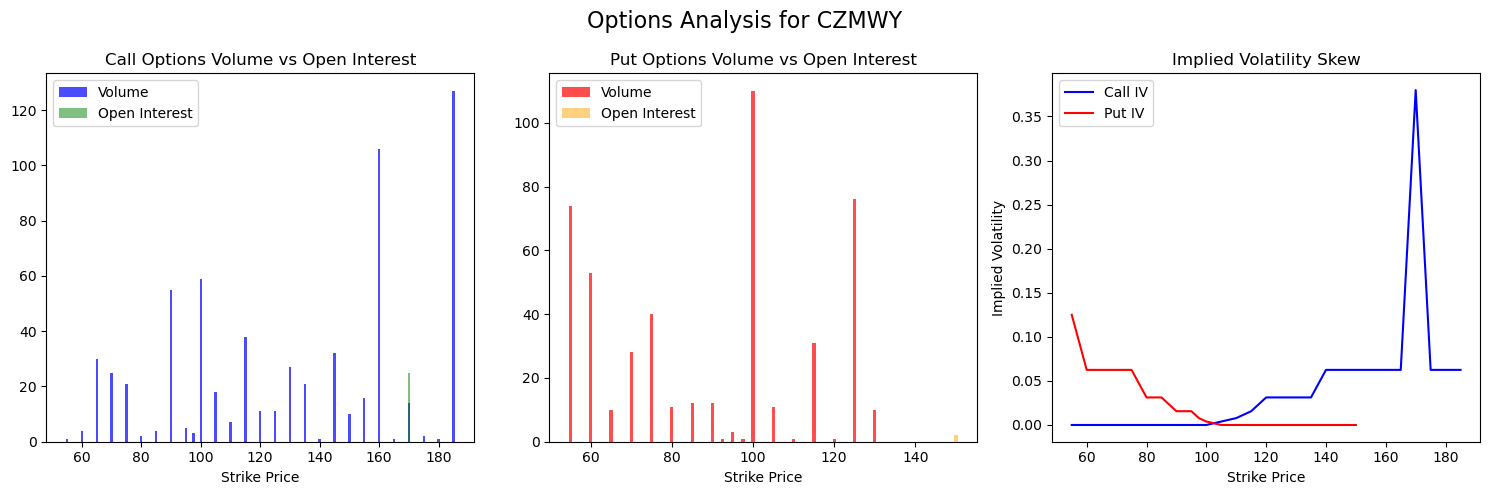

ITM Calls: 11, OTM Calls: 17
ITM Puts: 7, OTM Puts: 12


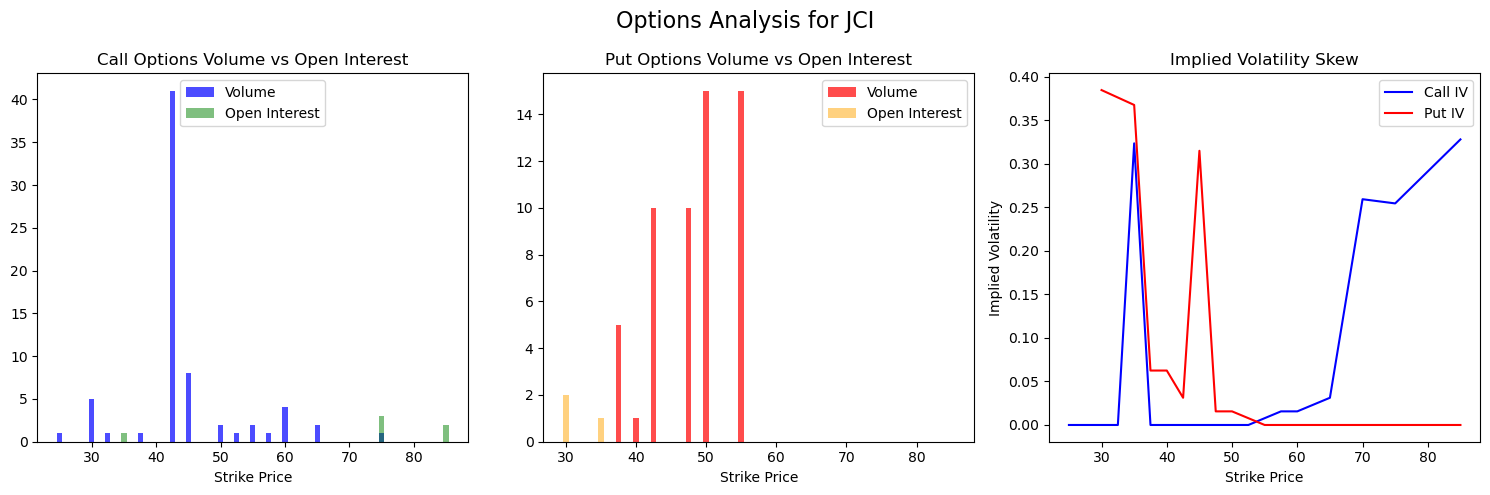

ITM Calls: 9, OTM Calls: 7
ITM Puts: 2, OTM Puts: 8


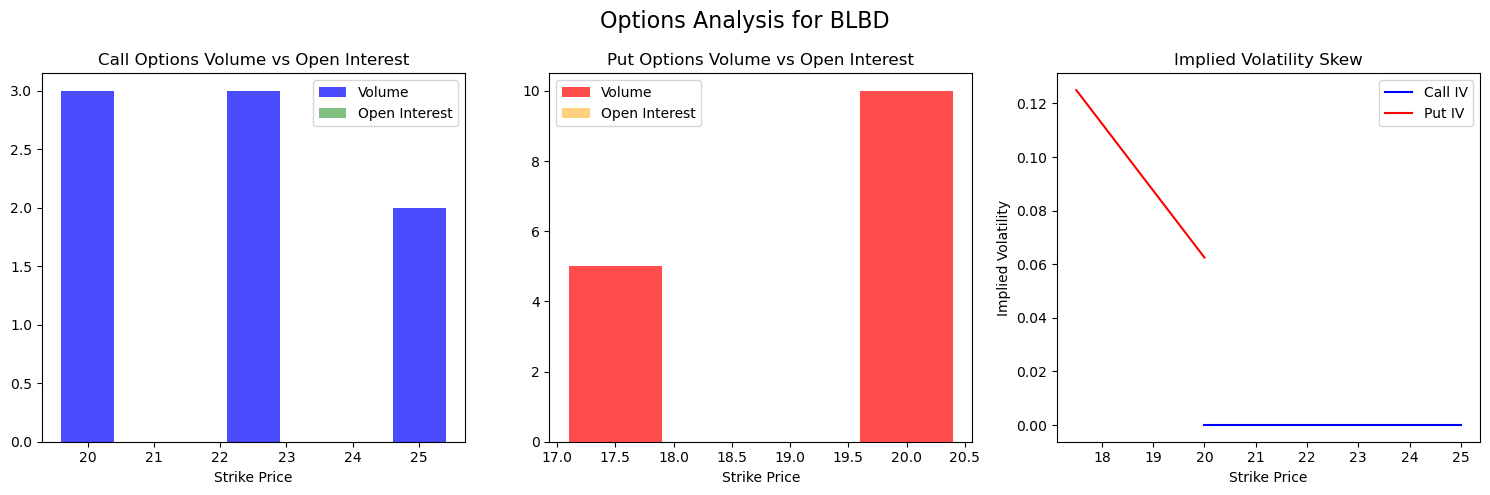

ITM Calls: 3, OTM Calls: 0
ITM Puts: 0, OTM Puts: 2


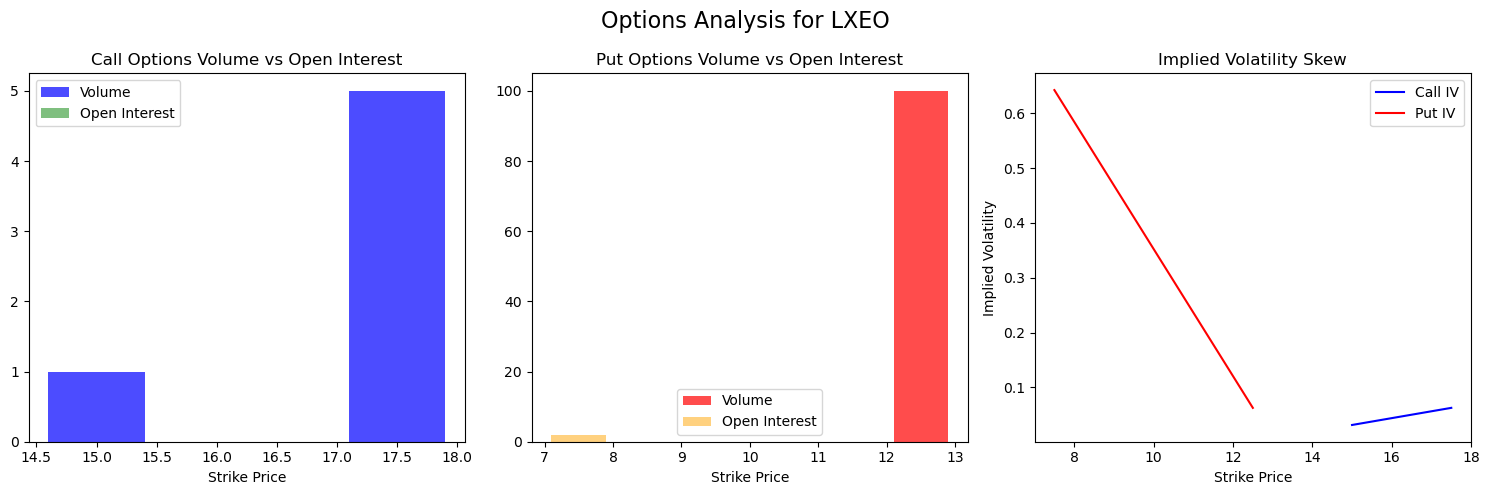

ITM Calls: 0, OTM Calls: 2
ITM Puts: 0, OTM Puts: 2


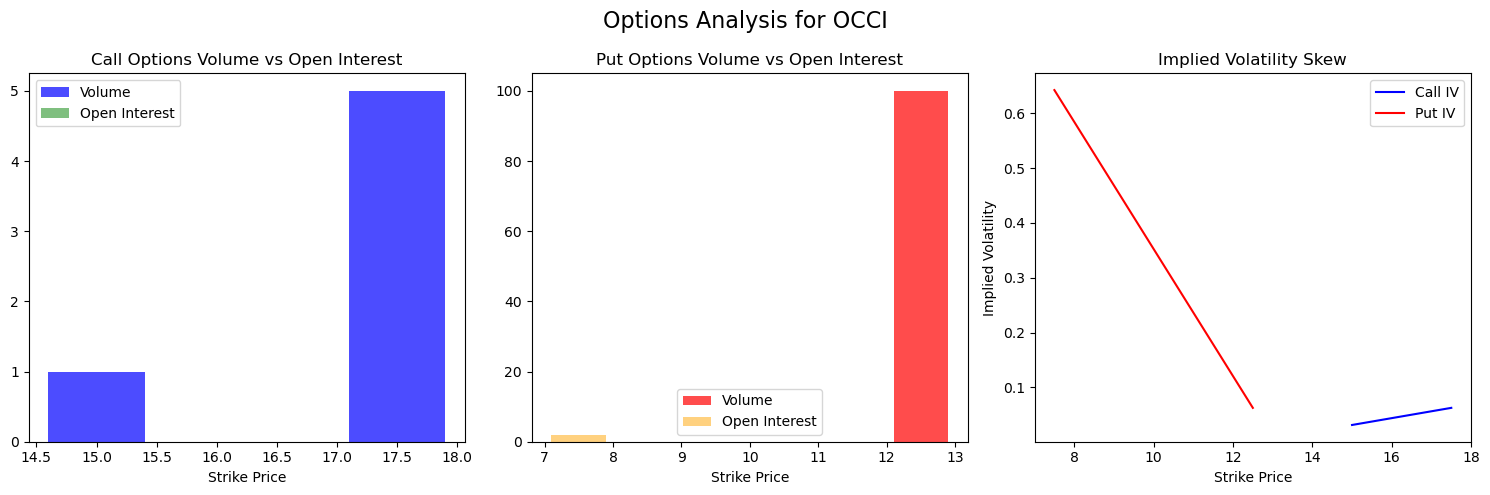

ITM Calls: 0, OTM Calls: 2
ITM Puts: 0, OTM Puts: 2


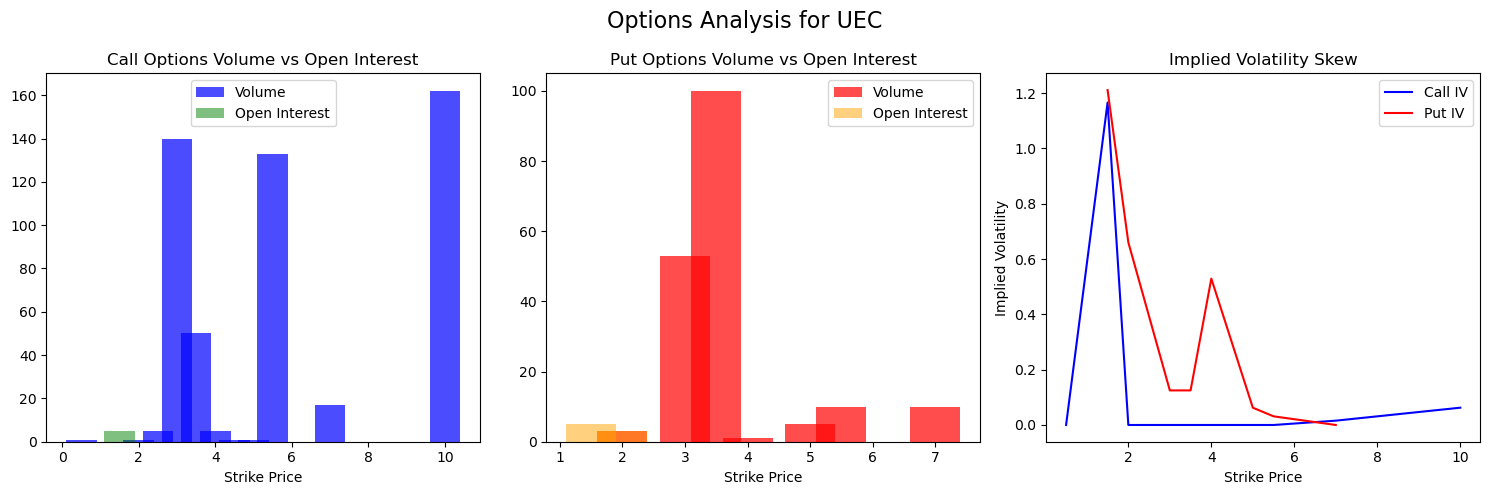

ITM Calls: 10, OTM Calls: 2
ITM Puts: 1, OTM Puts: 7


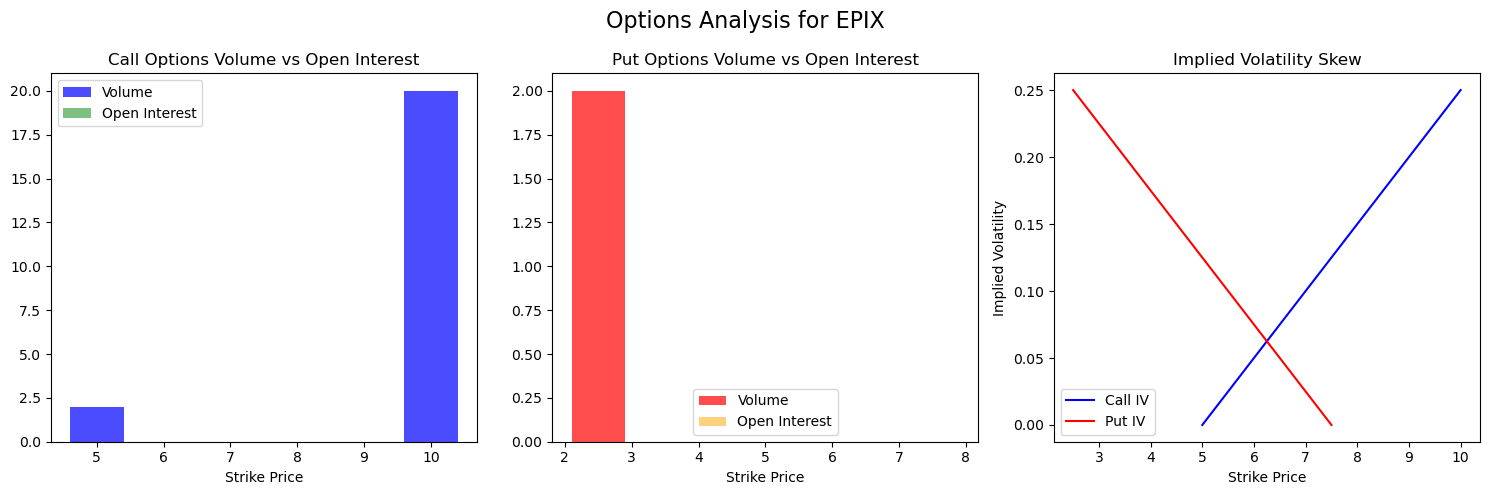

ITM Calls: 1, OTM Calls: 1
ITM Puts: 1, OTM Puts: 1


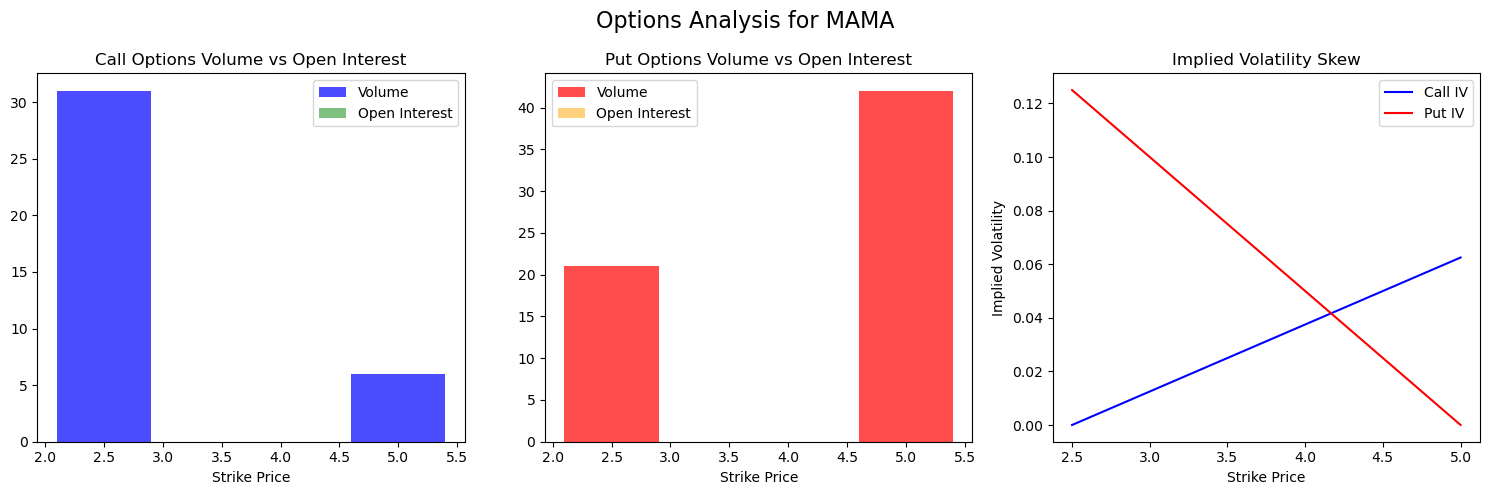

ITM Calls: 1, OTM Calls: 1
ITM Puts: 1, OTM Puts: 1


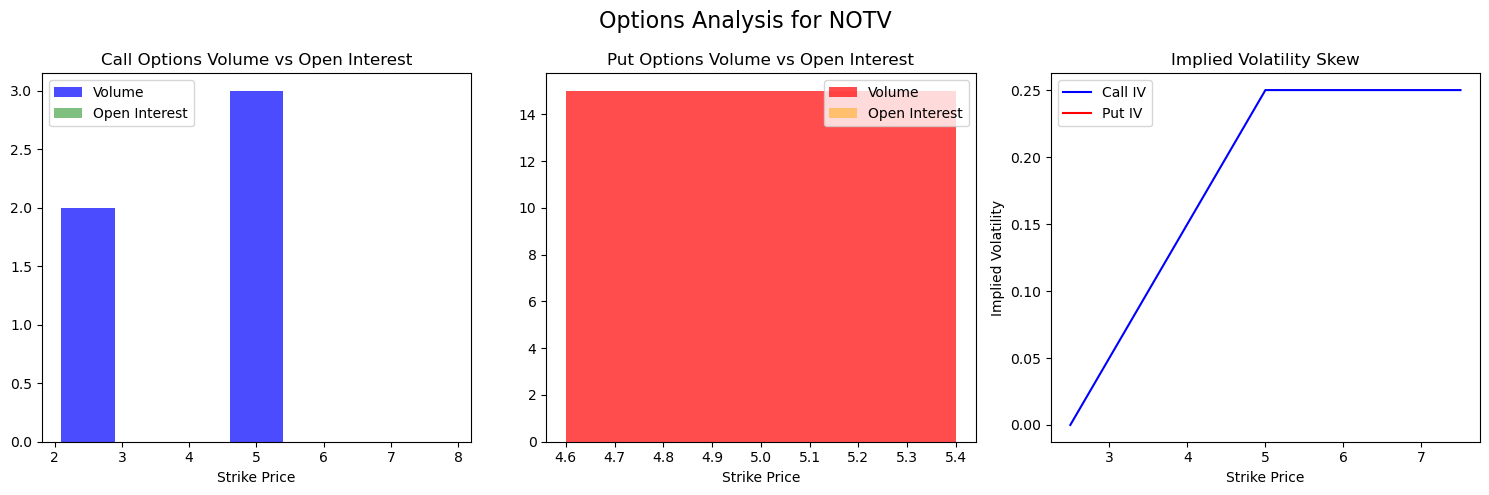

ITM Calls: 1, OTM Calls: 2
ITM Puts: 1, OTM Puts: 0


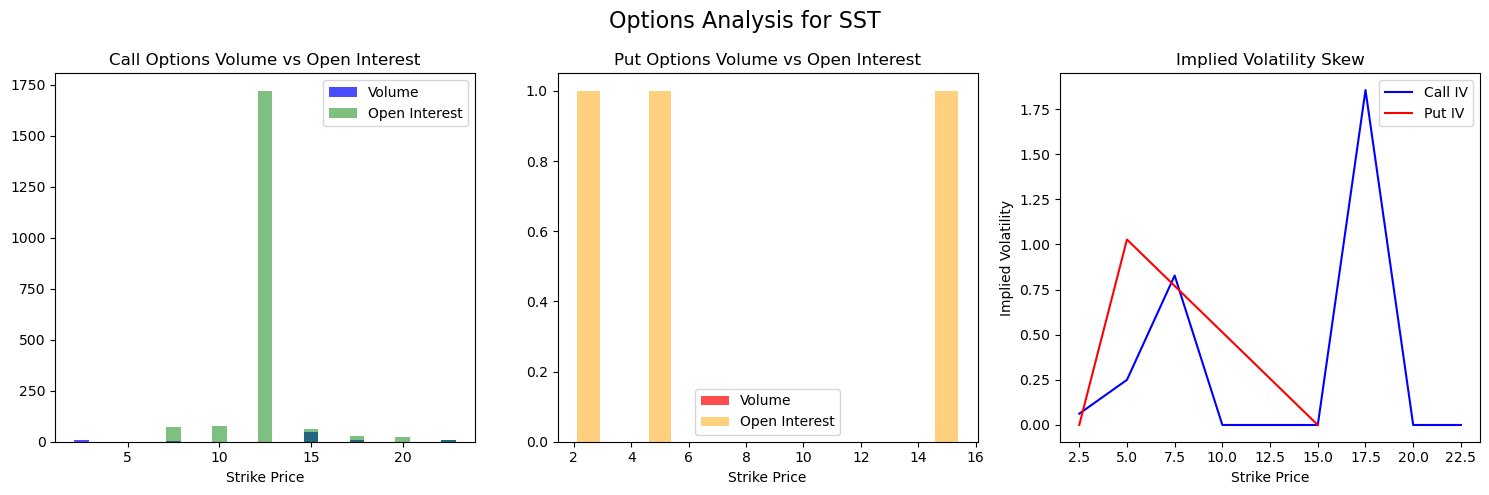

ITM Calls: 0, OTM Calls: 9
ITM Puts: 3, OTM Puts: 0


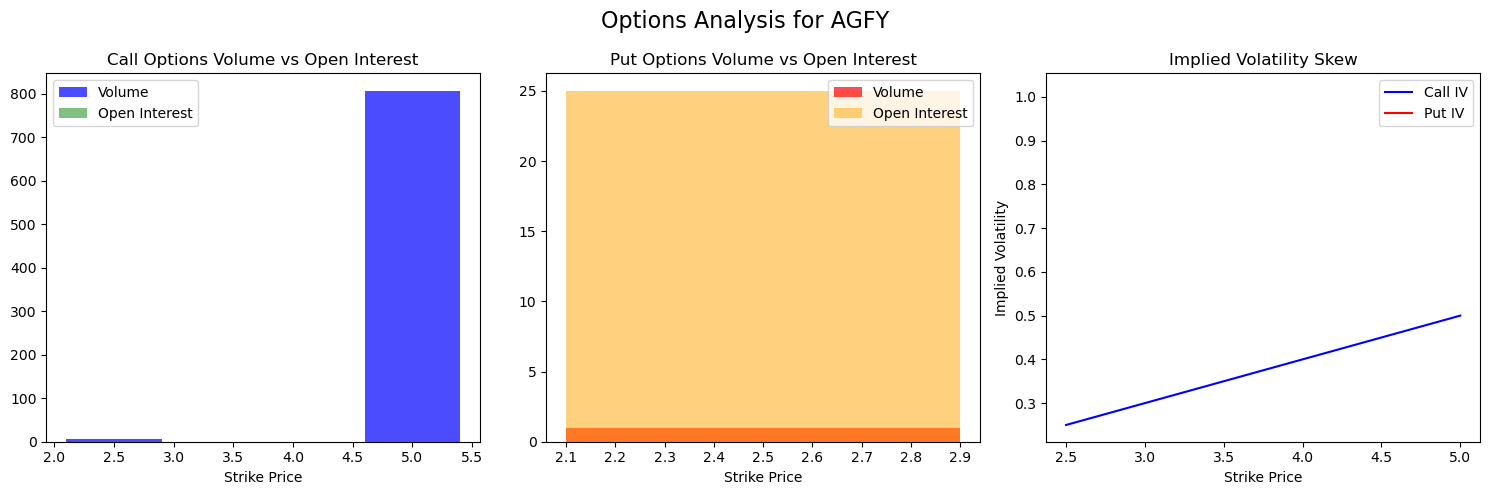

ITM Calls: 0, OTM Calls: 2
ITM Puts: 1, OTM Puts: 0


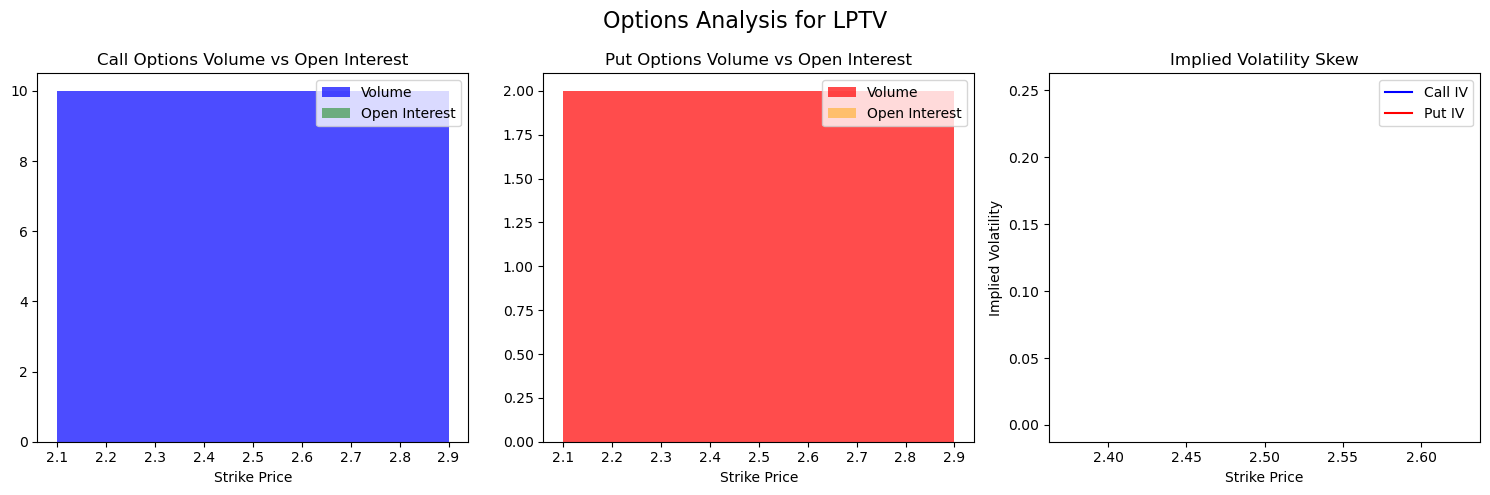

ITM Calls: 0, OTM Calls: 1
ITM Puts: 1, OTM Puts: 0


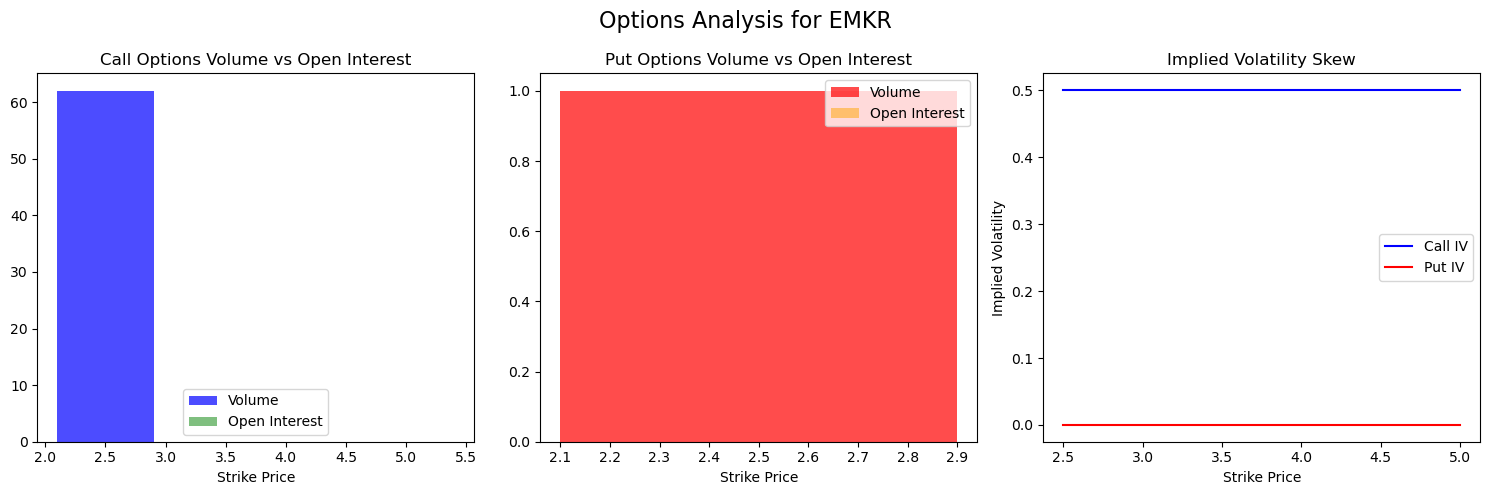

ITM Calls: 0, OTM Calls: 2
ITM Puts: 2, OTM Puts: 0


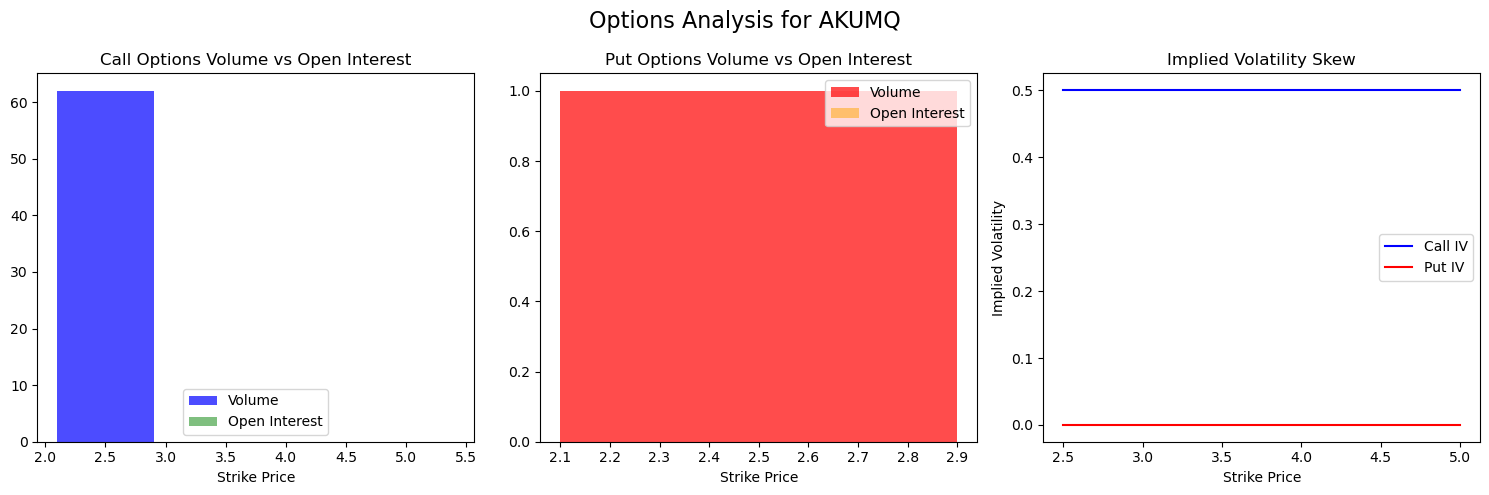

ITM Calls: 0, OTM Calls: 2
ITM Puts: 2, OTM Puts: 0


In [3]:
import matplotlib.pyplot as plt

# Assuming call_options and put_options are defined and contain the options data

# Iterate through the sorted list of tickers
for index, row in ticker_data_sorted.iterrows():
    ticker = row['Symbol']
    released = row['Released']

    stock = yf.Ticker(ticker)

    # Get options expiration dates
    exp_dates = stock.options

    # Retrieve and analyze options data for each expiration date
    for date in exp_dates:
        options_data = stock.option_chain(date)
        call_options, put_options = options_data.calls, options_data.puts

    # Plot only if earnings have been released
    if released == 'Yes':
        # Setting up the figure and axes for a 1 row, 3 column layout
        fig, axs = plt.subplots(1, 3, figsize=(15, 5))

        # Set the main title of the figure
        fig.suptitle(f"Options Analysis for {ticker}", fontsize=16)

        # Plot 1: Volume vs Open Interest for Calls
        axs[0].bar(call_options['strike'], call_options['volume'], color='blue', alpha=0.7, label='Volume')
        axs[0].bar(call_options['strike'], call_options['openInterest'], color='green', alpha=0.5, label='Open Interest')
        axs[0].set_title('Call Options Volume vs Open Interest')
        axs[0].set_xlabel('Strike Price')
        axs[0].legend()

        # Plot 2: Volume vs Open Interest for Puts
        axs[1].bar(put_options['strike'], put_options['volume'], color='red', alpha=0.7, label='Volume')
        axs[1].bar(put_options['strike'], put_options['openInterest'], color='orange', alpha=0.5, label='Open Interest')
        axs[1].set_title('Put Options Volume vs Open Interest')
        axs[1].set_xlabel('Strike Price')
        axs[1].legend()

        # Plot 3: Implied Volatility Skew
        axs[2].plot(call_options['strike'], call_options['impliedVolatility'], label='Call IV', color='blue')
        axs[2].plot(put_options['strike'], put_options['impliedVolatility'], label='Put IV', color='red')
        axs[2].set_title('Implied Volatility Skew')
        axs[2].set_xlabel('Strike Price')
        axs[2].set_ylabel('Implied Volatility')
        axs[2].legend()

        plt.tight_layout()
        plt.show()

        # Moneyness of Options
        itm_calls_count = call_options[call_options['inTheMoney']].shape[0]
        otm_calls_count = call_options[~call_options['inTheMoney']].shape[0]
        itm_puts_count = put_options[put_options['inTheMoney']].shape[0]
        otm_puts_count = put_options[~put_options['inTheMoney']].shape[0]

        print(f"ITM Calls: {itm_calls_count}, OTM Calls: {otm_calls_count}")
        print(f"ITM Puts: {itm_puts_count}, OTM Puts: {otm_puts_count}")